In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mlxtend.data import mnist_data


In [3]:
def Loss(Y, Y_predicted):
    return(sum(np.square(Y - Y_predicted))/Y.size)

def Normalize(X):
    return((X-X.min())/(X.max()-X.min()))

def Binarize(X):
    X [X <= 200] = 0
    X [X > 200] = 1       
    return X

In [4]:
X, y = mnist_data()
X.shape


(5000, 784)

In [5]:
X =Binarize(X)
X[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
def centroid(X):
    colSum=X.sum(axis=0)
    M00=np.sum(colSum)
    M10 =np.array([])
    M01 =np.array([])
    for i in range(7):
        M10= np.append(M10, (colSum[i]*i))
        
    for i in range(14):
       M01 = np.append(M01,(colSum[i]*i))
    M10 = np.sum(M10)
    M01 = np.sum(M01)
    if(M00==0):
        Xc= 0
        Yc= 0
    else:
        Xc = M10/M00
        Yc = M01/M00
    
    return Xc, Yc


In [7]:
def FeatureImage(X):
    im = X.reshape(28, 28)
    vector=np.array([])
    for i in range(2):
        for j in range(4):
            vector= np.append(vector, centroid(im[ j*7:((j+1)*7) ,i*14:((i+1)*14)]))
            #print(im[ j*7:((j+1)*7) ,i*14:((i+1)*14)])
    return vector
    #return im[0:7, 0:7]

In [8]:
# Pic1 = FeatureImage(X[10])
# Pic2 = FeatureImage(X[1])
# Pic3 = FeatureImage(X[2000])
# Pic4 = FeatureImage(X[2002])

# print(Loss(Pic1,Pic2))
# print(Loss(Pic1, Pic3))
# print(Loss(Pic3, Pic4))

# print(y[0])
# print(y[2000])
# print(y[2001])

In [23]:
vec = np.array([])
for i in range(5000):
    vec = np.append(vec, FeatureImage(X[i]))

In [26]:
vec.shape

(80000,)

In [27]:
vec.reshape(50000, 16)

ValueError: cannot reshape array of size 80000 into shape (80000,16)

In [9]:
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys', interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

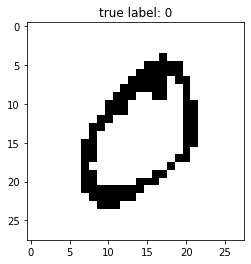

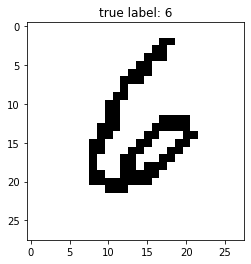

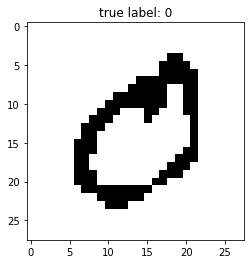

In [10]:
plot_digit(X, y, 0) 
plot_digit(X, y, 3000) 
plot_digit(X, y, 1) 



In [16]:
Pic1 = FeatureImage(X[10])
Pic2 = FeatureImage(X[1])
Pic3 = FeatureImage(X[2000])
Pic4 = FeatureImage(X[2002])
Pic0 = FeatureImage(X[0])


print(Loss(Pic1,Pic2))
print(Loss(Pic0, Pic2))
print(Loss(Pic1, Pic3))
print(Loss(Pic3, Pic4))

print(y[10])
print(y[1])
print(y[2000])
print(y[2002])
print(y[0])


1.053735234438265
0.8013036030550701
15.168057195322724
4.918175669085078
0
0
4
4
0


In [17]:
print(Pic0)

[ 0.          0.          0.         11.          0.          7.5
  0.         10.1875      2.75        2.75        2.90909091  4.18181818
  3.15384615  4.23076923  0.          0.        ]


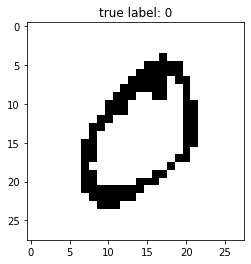

In [19]:
plot_digit(X, y, 0)